# IBM Capstone Project 

## Rent Properties Analysis in Rotterdam, the Netherlands

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Rotterdam is the 2nd largest city in the Netherlands. It is a major logistic and economic center and Europe's largest seaport. Moreover, it is always one of the main shipping industry centers which means that there are many companies located in this city . Consequently, employees and workers from different cities and countries move to Rotterdam. This creates high housing demand and supply also increases.

Rooms, houses, apartments in the Rotterdam are growing and very competitive. Hence, it is very difficult for new players who want to do their business in properties due to many offers are on the market.

In this study, we would like to analyze the rented properties in the Rotterdam. What are the main features that tenants are looking for? How to improve the properties and make it stands out from other competitors? Hence, the targeted stakeholders who will get benefit from this study will be housing companies, private rooms/apartment/house owners.


## Data <a name="data"></a>

According to the business problem, properties data in the Rotterdam and close-by venues around the properties area are required for the analysis. 
First, the data from Kaggle, an online community of data scientists and machine learning practitioners , is used (https://www.kaggle.com/juangesino/netherlands-rent-properties). This data has real-estate rental market information in the Netherlands such as room size, rental fee, room capacity, etc. However, we will mainly focus on Rotterdam city. Other real estates in other cities in the Netherlands will be excluded from this study.

Moreover, we used Foursquare API to gather near-by places around the properties e.g., restaurants, tram/train stations, bars, supermarket, etc. This information will be used together with properties data to see if the places around the properties have impact on the tenet decision.



### Data Exploration and Cleaning

First, we import all neccessary libraries that will be used in the following sections.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


# !pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


# ! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


Properties data in the Netherlands is accquired from Kaggle website.

In [2]:
rent_df = pd.read_json('properties.json', lines=True)
rent_df
# rent_df.to_csv('properties.csv', index=False, header=True)

,_id,additionalCosts,additionalCostsDescription,additionalCostsRaw,areaRaw,areaSqm,city,coverImageUrl,crawlStatus,crawledAt,...,smokingInside,source,title,toilet,url,userDisplayName,userId,userLastLoggedOn,userMemberSince,userPhotoUrl
0,{'$oid': '5d2b113a43cbfd7c77a998f4'},50.0,NaN,\n â‚¬ 50\n ...,14 m2,14,Rotterdam,https://resources.kamernet.nl/image/913b4b03-5...,done,{'$date': '2019-07-26T22:18:23.018+0000'},...,No,kamernet,West-Varkenoordseweg,Shared,https://kamernet.nl/en/for-rent/room-rotterdam...,Huize west,4680711.0,21-07-2019,26-06-2019,https://resources.kamernet.nl/Content/images/s...
1,{'$oid': '5d2b113a43cbfd7c77a9991a'},0.0,NaN,\n â‚¬ 0\n ...,30 m2,30,Amsterdam,https://resources.kamernet.nl/image/5e11d6b5-8...,done,{'$date': '2019-08-10T22:28:46.099+0000'},...,No,kamernet,Parelstraat,Own,https://kamernet.nl/en/for-rent/studio-amsterd...,Cor,1865530.0,20-07-2019,05-01-2012,https://resources.kamernet.nl/Content/images/p...
2,{'$oid': '5d2b113a43cbfd7c77a99931'},NaN,NaN,\n -\n ...,11 m2,11,Amsterdam,https://resources.kamernet.nl/image/74b93a27-a...,done,{'$date': '2019-10-02T22:00:33.141+0000'},...,Yes,kamernet,Zeilstraat,Shared,https://kamernet.nl/en/for-rent/room-amsterdam...,Felix,4466569.0,20-07-2019,05-07-2018,https://resources.kamernet.nl/Content/images/p...
3,{'$oid': '5d2b113a43cbfd7c77a9994a'},NaN,NaN,-,16 m2,16,Assen,https://resources.kamernet.nl/image/84e95365-6...,done,{'$date': '2019-07-18T22:00:31.018+0000'},...,Yes,kamernet,Ruiterakker,Shared,https://kamernet.nl/en/for-rent/room-assen/rui...,Albert,783341.0,26-07-2019,09-11-2006,https://resources.kamernet.nl/Content/images/p...
4,{'$oid': '5d2b113b43cbfd7c77a9997c'},NaN,NaN,\n -\n ...,22 m2,22,Rotterdam,https://resources.kamernet.nl/Content/images/p...,done,{'$date': '2019-08-12T02:06:14.635+0000'},...,No,kamernet,Zwart Janstraat,Shared,https://kamernet.nl/en/for-rent/room-rotterdam...,John,3338401.0,19-07-2019,24-08-2014,https://resources.kamernet.nl/image/3177baf7-5...
5,{'$oid': '5d2b113b43cbfd7c77a99993'},18.0,NaN,\n â‚¬ 18\n ...,14 m2,14,Groningen,https://resources.kamernet.nl/image/5756f247-7...,done,{'$date': '2019-08-10T22:29:17.815+0000'},...,Not important,kamernet,Nieuwe Kijk in 't Jatstraat,Shared,https://kamernet.nl/en/for-rent/room-groningen...,Marloet,3227373.0,20-07-2019,24-03-2014,https://resources.kamernet.nl/Content/images/p...
6,{'$oid': '5d2b113b43cbfd7c77a999ac'},NaN,NaN,-,22 m2,22,Zeist,https://resources.kamernet.nl/image/1ca3d9b5-1...,done,{'$date': '2019-07-21T22:15:21.634+0000'},...,No,kamernet,Wilhelminalaan,Shared,https://kamernet.nl/en/for-rent/room-zeist/wil...,Georgia,885813.0,22-07-2019,19-05-2007,https://resources.kamernet.nl/Content/images/p...
7,{'$oid': '5d2b113b43cbfd7c77a999c4'},NaN,NaN,\n -\n ...,17 m2,17,Rotterdam,https://resources.kamernet.nl/image/6be3f88e-f...,done,{'$date': '2019-07-17T22:00:31.941+0000'},...,No,kamernet,Willem Ruyslaan,Own,https://kamernet.nl/en/for-rent/room-rotterdam...,Carter,3001644.0,21-07-2019,03-05-2013,https://resources.kamernet.nl/image/bc45646b-0...
8,{'$oid': '5d2b113b43cbfd7c77a999da'},NaN,NaN,-,16 m2,16,Maastricht,https://resources.kamernet.nl/image/6e625591-d...,done,{'$date': '2019-08-10T00:14:27.014+0000'},...,No,kamernet,Brusselseweg,Shared,https://kamernet.nl/en/for-rent/room-maastrich...,John,488742.0,26-07-2019,17-01-2005,https://resources.kamernet.nl/Content/images/p...
9,{'$oid': '5d2b113c43cbfd7c77a999f2'},NaN,NaN,\n -\n ...,20 m2,20,Callantsoog,https://resources.kamernet.nl/image/bc5ca778-d...,done,{'$date': '2019-08-10T22:29:48.902+0000'},...,Yes,kamernet,De Riethof,Own,https://kamernet.nl/en/for-rent/room-callantso...,Nico,782382.0,20-07-2019,07-11-2006,https://resources.kamernet.nl/Content/images/p...


In [3]:
rent_df.shape

(46722, 62)

Filter only properties in Rotterdam city and select interesting features for the analysis.

In [4]:
rent_df = rent_df[rent_df['city']== 'Rotterdam'] #consider only room in Rotterdam
rent_df = rent_df[rent_df['isRoomActive']== 'false'] #check characteristice of rented rooms only
rent_df['matchCapacity'] = rent_df['matchCapacity'].str.extract('(\d+)') #get number of capacity
rent_df.reset_index(inplace=True)
rent_df['id'] = rent_df['_id'].apply(lambda x: x.get('$oid'))

rent_df

,index,_id,additionalCosts,additionalCostsDescription,additionalCostsRaw,areaRaw,areaSqm,city,coverImageUrl,crawlStatus,...,source,title,toilet,url,userDisplayName,userId,userLastLoggedOn,userMemberSince,userPhotoUrl,id
0,7,{'$oid': '5d2b113b43cbfd7c77a999c4'},NaN,NaN,\n -\n ...,17 m2,17,Rotterdam,https://resources.kamernet.nl/image/6be3f88e-f...,done,...,kamernet,Willem Ruyslaan,Own,https://kamernet.nl/en/for-rent/room-rotterdam...,Carter,3001644.0,21-07-2019,03-05-2013,https://resources.kamernet.nl/image/bc45646b-0...,5d2b113b43cbfd7c77a999c4
1,10,{'$oid': '5d2b113c43cbfd7c77a99a0d'},NaN,NaN,-,25 m2,25,Rotterdam,https://resources.kamernet.nl/image/ea3aea77-0...,done,...,kamernet,Donkerslootstraat,Shared,https://kamernet.nl/en/for-rent/room-rotterdam...,Anil,4690056.0,22-07-2019,07-07-2019,https://resources.kamernet.nl/Content/images/p...,5d2b113c43cbfd7c77a99a0d
2,59,{'$oid': '5d2b115d43cbfd7c77a9a588'},NaN,NaN,\n -\n ...,29 m2,29,Rotterdam,https://resources.kamernet.nl/image/24a54170-7...,done,...,kamernet,Schoonderloostraat,Shared,https://kamernet.nl/en/for-rent/room-rotterdam...,Ken,1168141.0,19-07-2019,12-10-2008,https://resources.kamernet.nl/Content/images/p...,5d2b115d43cbfd7c77a9a588
3,208,{'$oid': '5d2b11b343cbfd7c77a9c6e4'},NaN,NaN,\n -\n ...,22 m2,22,Rotterdam,https://resources.kamernet.nl/image/24350859-8...,done,...,kamernet,Driemorgenstraat,Shared,https://kamernet.nl/en/for-rent/room-rotterdam...,Auke,4161506.0,20-07-2019,24-05-2017,https://resources.kamernet.nl/image/f76cf2a0-b...,5d2b11b343cbfd7c77a9c6e4
4,211,{'$oid': '5d2b11b443cbfd7c77a9c72e'},NaN,NaN,-,13 m2,13,Rotterdam,https://resources.kamernet.nl/image/b685f521-4...,done,...,kamernet,Goudsesingel,Shared,https://kamernet.nl/en/for-rent/room-rotterdam...,Michael,3173004.0,26-07-2019,30-12-2013,https://resources.kamernet.nl/image/6135d153-0...,5d2b11b443cbfd7c77a9c72e
5,215,{'$oid': '5d2b11b443cbfd7c77a9c7ab'},NaN,NaN,\n -\n ...,10 m2,10,Rotterdam,https://resources.kamernet.nl/image/c031e61f-f...,done,...,kamernet,Insulindestraat,Shared,https://kamernet.nl/en/for-rent/room-rotterdam...,Alexander,4394334.0,21-07-2019,08-03-2018,https://resources.kamernet.nl/Content/images/p...,5d2b11b443cbfd7c77a9c7ab
6,250,{'$oid': '5d2b11ca43cbfd7c77a9cf64'},0.0,NaN,â‚¬ 0,13 m2,13,Rotterdam,https://resources.kamernet.nl/image/8c654da5-3...,done,...,kamernet,Kortebrantstraat,Shared,https://kamernet.nl/en/for-rent/room-rotterdam...,Cindy,2982094.0,26-07-2019,01-04-2013,https://resources.kamernet.nl/image/5c114e72-1...,5d2b11ca43cbfd7c77a9cf64
7,340,{'$oid': '5d2b120143cbfd7c77a9e216'},NaN,NaN,-,76 m2,76,Rotterdam,https://resources.kamernet.nl/image/98ff5915-4...,done,...,kamernet,Dorpsweg,Own,https://kamernet.nl/en/for-rent/apartment-rott...,Tom,3164127.0,19-07-2019,10-12-2013,https://resources.kamernet.nl/image/eb99b9a3-2...,5d2b120143cbfd7c77a9e216
8,342,{'$oid': '5d2b120943cbfd7c77a9e463'},0.0,NaN,â‚¬ 0,110 m2,110,Rotterdam,https://resources.kamernet.nl/image/5357bb5a-4...,done,...,kamernet,Katendrechtse Lagedijk,Own,https://kamernet.nl/en/for-rent/apartment-rott...,S.,881681.0,27-07-2019,12-05-2007,https://resources.kamernet.nl/Content/images/p...,5d2b120943cbfd7c77a9e463
9,390,{'$oid': '5d2b122043cbfd7c77a9ed85'},0.0,NaN,\n â‚¬ 0\n ...,22 m2,22,Rotterdam,https://resources.kamernet.nl/image/51571f62-8...,done,...,kamernet,Rochussenstraat,Shared,https://kamernet.nl/en/for-rent/room-rotterdam...,Hanna,4400004.0,17-07-2019,19-03-2018,https://resources.kamernet.nl/image/9fbb6cbc-c...,5d2b122043cbfd7c77a9ed85


In [5]:
rent_df.shape

(230, 64)

In [6]:
rent_df = rent_df.loc[:, ['id','areaSqm','furnish','internet','matchCapacity','rent','latitude','longitude','postalCode']]
rent_df.head()

,id,areaSqm,furnish,internet,matchCapacity,rent,latitude,longitude,postalCode
0,5d2b113b43cbfd7c77a999c4,17,Furnished,Yes,1,857,51.921123,4.505328,3063ER
1,5d2b113c43cbfd7c77a99a0d,25,Furnished,Yes,4,600,51.893195,4.516478,3074WL
2,5d2b115d43cbfd7c77a9a588,29,Furnished,Unknown,1,530,51.905459,4.453957,3024TX
3,5d2b11b343cbfd7c77a9c6e4,22,Unfurnished,Yes,1,350,51.890358,4.475083,3083GA
4,5d2b11b443cbfd7c77a9c72e,13,Furnished,Yes,1,699,51.924588,4.486010,3011KM


Transform catergorical data to numerical.
- Column 'furnish'  ==> Unfurnished(0), Furnished(1), Uncarpeted(2)
- Column 'internet' ==> No(0), Yes(1), Unknown(2)

In [7]:
rent_df.replace({'Unfurnished': 0, 'Furnished': 1, 'Uncarpeted':2}, inplace=True)
rent_df.replace({'No': 0, 'Yes': 1, 'Unknown':2}, inplace=True)
rent_df.head()

,id,areaSqm,furnish,internet,matchCapacity,rent,latitude,longitude,postalCode
0,5d2b113b43cbfd7c77a999c4,17,1,1,1,857,51.921123,4.505328,3063ER
1,5d2b113c43cbfd7c77a99a0d,25,1,1,4,600,51.893195,4.516478,3074WL
2,5d2b115d43cbfd7c77a9a588,29,1,2,1,530,51.905459,4.453957,3024TX
3,5d2b11b343cbfd7c77a9c6e4,22,0,1,1,350,51.890358,4.475083,3083GA
4,5d2b11b443cbfd7c77a9c72e,13,1,1,1,699,51.924588,4.486010,3011KM


Visualize the location of the properties in Rotterdam by using latitude and longtitude.

In [8]:
address = 'Rotterdam, NL'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.9228934 4.4631786


In [9]:
# create map of Toronto using latitude and longitude values
map_rotterdam = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng in zip(rent_df['latitude'], rent_df['longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_rotterdam)  
    
map_rotterdam

Find venues close to each properties by using Foursquare API with the condition that the distance between venues and properties must not be more than 500 meters and limit for 30 venues.

In [11]:
# Set up Foursquare credentials
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'

# define the nummber of venue close-by in 500 meters
radius = 500
LIMIT = 30
print('Your Foursquare setup is completed')

Your Foursquare setup is completed


In [12]:
def getNearbyVenues(ids, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for _id, lat, lng in zip(ids, latitudes, longitudes):            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            _id, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['id', 
                  'id Latitude', 
                  'id Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print('Done!')
    return(nearby_venues)

In [13]:
rotterdam_venues = getNearbyVenues(ids=rent_df['id'], latitudes=rent_df['latitude'], longitudes=rent_df['longitude'])

Done!


In [14]:
rotterdam_venues.head()

,id,id Latitude,id Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,5d2b113b43cbfd7c77a999c4,51.921123,4.505328,The Student Hotel Rotterdam,51.921319,4.505519,Hotel
1,5d2b113b43cbfd7c77a999c4,51.921123,4.505328,Aloha,51.919768,4.500730,Restaurant
2,5d2b113b43cbfd7c77a999c4,51.921123,4.505328,De Hemel op Aarde,51.922789,4.500983,Tapas Restaurant
3,5d2b113b43cbfd7c77a999c4,51.921123,4.505328,Bodymentors,51.921896,4.501067,Gym
4,5d2b113b43cbfd7c77a999c4,51.921123,4.505328,Tropicana,51.919768,4.501717,Pool


In [15]:
print('There are {} uniques categories.'.format(len(rotterdam_venues['Venue Category'].unique())))

There are 219 uniques categories.


Find common venues in the properties' areas by using one hot encoding techniques.

In [16]:
# one hot encoding
rotterdam_onehot = pd.get_dummies(rotterdam_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
rotterdam_onehot['id'] = rotterdam_venues['id']

# move neighborhood column to the first column
fixed_columns = [rotterdam_onehot.columns[-1]] + list(rotterdam_onehot.columns[:-1])
rotterdam_onehot = rotterdam_onehot[fixed_columns]

rotterdam_onehot.head()

,id,Accessories Store,African Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,5d2b113b43cbfd7c77a999c4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5d2b113b43cbfd7c77a999c4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5d2b113b43cbfd7c77a999c4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5d2b113b43cbfd7c77a999c4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5d2b113b43cbfd7c77a999c4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
rotterdam_grouped = rotterdam_onehot.groupby('id').mean().reset_index()
rotterdam_grouped.head()

,id,Accessories Store,African Restaurant,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,5d2b113b43cbfd7c77a999c4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,5d2b113c43cbfd7c77a99a0d,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
2,5d2b115d43cbfd7c77a9a588,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.055556,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
3,5d2b11b343cbfd7c77a9c6e4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0
4,5d2b11b443cbfd7c77a9c72e,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,...,0.0,0.0,0.033333,0.033333,0.033333,0.033333,0.0,0.0,0.033333,0.0


In [18]:
rotterdam_grouped.shape

(230, 220)

Find the 10 most common venues around each property.

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [20]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['id']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
rent_venues_sorted = pd.DataFrame(columns=columns)
rent_venues_sorted['id'] = rotterdam_grouped['id']

for ind in np.arange(rotterdam_grouped.shape[0]):
    rent_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rotterdam_grouped.iloc[ind, :], num_top_venues)

rent_venues_sorted.head()

,id,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5d2b113b43cbfd7c77a999c4,Ice Cream Shop,Bar,Deli / Bodega,Drugstore,Pool,Fried Chicken Joint,Gym,Supermarket,Greek Restaurant,Burger Joint
1,5d2b113c43cbfd7c77a99a0d,Tram Station,Soccer Stadium,Sandwich Place,Museum,Middle Eastern Restaurant,Market,Fast Food Restaurant,Train Station,Furniture / Home Store,Farmers Market
2,5d2b115d43cbfd7c77a9a588,Theater,Restaurant,Hotel,Café,Music Venue,Supermarket,Outdoor Sculpture,Coffee Shop,Bistro,Boat or Ferry
3,5d2b11b343cbfd7c77a9c6e4,Supermarket,Tram Station,Pool Hall,Flea Market,Burger Joint,Cosmetics Shop,Resort,Friterie,Fried Chicken Joint,French Restaurant
4,5d2b11b443cbfd7c77a9c72e,Italian Restaurant,Organic Grocery,Asian Restaurant,Bar,Hawaiian Restaurant,Bakery,Seafood Restaurant,Smoke Shop,Sandwich Place,Food & Drink Shop


## Methodology <a name="methodology"></a>

To find similar properties in Rotterdam, we used K-means clustering to determine and segment them into the same cluster. We used the properties data together with common venues nearby from Foursquare API as an input of the clustering.

However, we first need to define the number of clusters (K) by using elbow curve to identify the most suitable number for this study.

Cluster properties having similar features

In [21]:
from sklearn.cluster import KMeans  # import k-means from clustering stage

# add more features for clustering
rotterdam_grouped['areaSqm'] = rent_df['areaSqm']
rotterdam_grouped['furnish'] = rent_df['furnish']
rotterdam_grouped['internet'] = rent_df['internet']
rotterdam_grouped['matchCapacity'] = rent_df['matchCapacity']
rotterdam_grouped['rent'] = rent_df['rent']

Sum_of_squared_distances = []
rotterdam_grouped_clustering = rotterdam_grouped.drop('id', 1)

K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(rotterdam_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

Plot elbow curve to find the most suitable k (number of clusters)

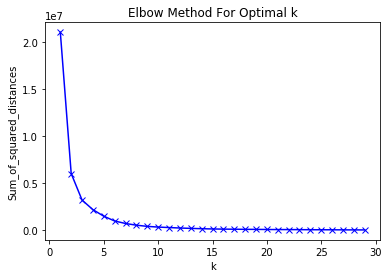

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the elbow curve, we could clearly see that when the number of clusters is above 6, the squared distance values barely change. Hence, we select k = 6 as an appropriate  number for k-means clustering.

In [23]:
# set number of clusters
kclusters = 6

rotterdam_grouped_clustering = rotterdam_grouped.drop('id', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rotterdam_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 3, 0, 5, 3, 3, 2, 1, 0])

Add the cluster label from K-mean clustering to the dataframe.

In [24]:
# add clustering labels
rent_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

rotterdam_merged = rent_df

# merge rotterdam_grouped with rent_data to add latitude/longitude for each neighborhood
rotterdam_merged = rotterdam_merged.join(rent_venues_sorted.set_index('id'), on='id')

rotterdam_merged.head()

,id,areaSqm,furnish,internet,matchCapacity,rent,latitude,longitude,postalCode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5d2b113b43cbfd7c77a999c4,17,1,1,1,857,51.921123,4.505328,3063ER,1,Ice Cream Shop,Bar,Deli / Bodega,Drugstore,Pool,Fried Chicken Joint,Gym,Supermarket,Greek Restaurant,Burger Joint
1,5d2b113c43cbfd7c77a99a0d,25,1,1,4,600,51.893195,4.516478,3074WL,3,Tram Station,Soccer Stadium,Sandwich Place,Museum,Middle Eastern Restaurant,Market,Fast Food Restaurant,Train Station,Furniture / Home Store,Farmers Market
2,5d2b115d43cbfd7c77a9a588,29,1,2,1,530,51.905459,4.453957,3024TX,3,Theater,Restaurant,Hotel,Café,Music Venue,Supermarket,Outdoor Sculpture,Coffee Shop,Bistro,Boat or Ferry
3,5d2b11b343cbfd7c77a9c6e4,22,0,1,1,350,51.890358,4.475083,3083GA,0,Supermarket,Tram Station,Pool Hall,Flea Market,Burger Joint,Cosmetics Shop,Resort,Friterie,Fried Chicken Joint,French Restaurant
4,5d2b11b443cbfd7c77a9c72e,13,1,1,1,699,51.924588,4.486010,3011KM,5,Italian Restaurant,Organic Grocery,Asian Restaurant,Bar,Hawaiian Restaurant,Bakery,Seafood Restaurant,Smoke Shop,Sandwich Place,Food & Drink Shop


Visualize all 6 clusters of properties that have similar features.

In [25]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(rotterdam_merged['latitude'], rotterdam_merged['longitude'], rotterdam_merged['id'], rotterdam_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Analysis <a name="analysis"></a>

Before analyzing the result, we ranked the clusters by the number properties. It could be seen that most of the properties fall into cluster 3, 0, 5, 1, 2 and 4 respectively. Then, we examine all clusters in detail to see the common features within a cluster and the difference across clusters.

In [26]:
rotterdam_merged['Cluster Labels'].value_counts()

3    90
0    56
5    36
1    25
2    21
4     2
Name: Cluster Labels, dtype: int64

### Examine Clusters

1. Cluster 3 (90 properties)

In [27]:
c3 = rotterdam_merged.loc[rotterdam_merged['Cluster Labels'] == 3, rotterdam_merged.columns[[0] + list(range(1, rotterdam_merged.shape[1]))]]
c3

,id,areaSqm,furnish,internet,matchCapacity,rent,latitude,longitude,postalCode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,5d2b113c43cbfd7c77a99a0d,25,1,1,4,600,51.893195,4.516478,3074WL,3,Tram Station,Soccer Stadium,Sandwich Place,Museum,Middle Eastern Restaurant,Market,Fast Food Restaurant,Train Station,Furniture / Home Store,Farmers Market
2,5d2b115d43cbfd7c77a9a588,29,1,2,1,530,51.905459,4.453957,3024TX,3,Theater,Restaurant,Hotel,Café,Music Venue,Supermarket,Outdoor Sculpture,Coffee Shop,Bistro,Boat or Ferry
5,5d2b11b443cbfd7c77a9c7ab,10,1,1,1,500,51.931572,4.469902,3038JV,3,Hotel,Restaurant,Supermarket,Fast Food Restaurant,Coffee Shop,Latin American Restaurant,Bagel Shop,Café,Shopping Mall,Sandwich Place
6,5d2b11ca43cbfd7c77a9cf64,13,1,1,1,560,51.926414,4.485982,3031PN,3,Coffee Shop,French Restaurant,Italian Restaurant,Organic Grocery,Asian Restaurant,Deli / Bodega,Optical Shop,Chinese Restaurant,Farmers Market,Food & Drink Shop
16,5d2b129943cbfd7c77aa1849,12,1,1,1,475,51.888787,4.480551,3083VP,3,Supermarket,Pool Hall,Burger Joint,Convenience Store,BBQ Joint,Flea Market,Flower Shop,Furniture / Home Store,Friterie,Fried Chicken Joint
21,5d2b12f243cbfd7c77aa35e4,25,1,1,1,525,51.928803,4.469248,3033VH,3,Coffee Shop,Café,Restaurant,Middle Eastern Restaurant,Italian Restaurant,Convenience Store,Bagel Shop,Sandwich Place,Supermarket,Spanish Restaurant
22,5d2b12ff43cbfd7c77aa3ace,55,1,1,1,600,51.935073,4.458500,3039RC,3,Supermarket,Chinese Restaurant,Indonesian Restaurant,Cheese Shop,Sports Bar,Ice Cream Shop,Food & Drink Shop,Pub,Fast Food Restaurant,Food Court
23,5d2b130843cbfd7c77aa3df3,17,0,1,1,550,51.915548,4.443283,3026GA,3,Supermarket,Indian Restaurant,Indian Chinese Restaurant,Department Store,Plaza,Salon / Barbershop,Café,Drugstore,Halal Restaurant,Tram Station
24,5d2b130943cbfd7c77aa3ed2,10,1,1,3,502,51.927062,4.507042,3061EN,3,Supermarket,Bistro,Gym / Fitness Center,Ice Cream Shop,Drugstore,Thai Restaurant,South American Restaurant,Indian Restaurant,Sushi Restaurant,Bar
29,5d2b134543cbfd7c77aa53ce,25,1,1,2,550,51.966860,4.577649,3068PZ,3,Pool,Pizza Place,Supermarket,Middle Eastern Restaurant,Metro Station,Flower Shop,Furniture / Home Store,Friterie,Fried Chicken Joint,French Restaurant


In [28]:
c3.describe()

,areaSqm,furnish,internet,rent,latitude,longitude,Cluster Labels
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0
mean,21.355556,0.844444,0.900000,536.855556,51.920759,4.489754,3.0
std,13.162179,0.495170,0.475229,38.995696,0.016209,0.029858,0.0
min,6.000000,0.000000,0.000000,470.000000,51.887516,4.434512,3.0
25%,14.000000,1.000000,1.000000,500.000000,51.914889,4.466211,3.0
50%,17.000000,1.000000,1.000000,535.500000,51.923469,4.486051,3.0
75%,25.000000,1.000000,1.000000,570.000000,51.928359,4.507115,3.0
max,102.000000,2.000000,2.000000,610.000000,51.966860,4.577649,3.0


2. Cluster 0 (56 properties)

In [29]:
c0 = rotterdam_merged.loc[rotterdam_merged['Cluster Labels'] == 0, rotterdam_merged.columns[[0] + list(range(1, rotterdam_merged.shape[1]))]]
c0

,id,areaSqm,furnish,internet,matchCapacity,rent,latitude,longitude,postalCode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,5d2b11b343cbfd7c77a9c6e4,22,0,1,1,350,51.890358,4.475083,3083GA,0,Supermarket,Tram Station,Pool Hall,Flea Market,Burger Joint,Cosmetics Shop,Resort,Friterie,Fried Chicken Joint,French Restaurant
9,5d2b122043cbfd7c77a9ed85,22,1,1,3,450,51.909525,4.456198,3023DE,0,Restaurant,Bar,Pub,Music Venue,Caribbean Restaurant,Seafood Restaurant,Supermarket,Coffee Shop,Theater,Indian Restaurant
10,5d2b124143cbfd7c77a9f8fd,8,0,1,1,430,51.911681,4.448680,3023PG,0,Restaurant,Pub,Bar,Plaza,Drugstore,Café,Chinese Restaurant,Coffee Shop,Pool Hall,Fast Food Restaurant
11,5d2b125743cbfd7c77aa00c8,18,1,1,1,420,51.921717,4.513346,3062TL,0,Breakfast Spot,Bar,Bakery,Ice Cream Shop,Drugstore,Convenience Store,Fast Food Restaurant,Food Truck,Supermarket,Tapas Restaurant
12,5d2b126443cbfd7c77aa0598,16,0,1,1,400,51.945019,4.482336,3051GH,0,Thai Restaurant,Tram Station,Restaurant,Asian Restaurant,French Restaurant,Bowling Alley,Gym,Supermarket,Sushi Restaurant,Bookstore
13,5d2b127943cbfd7c77aa0ce0,9,1,1,1,360,51.920423,4.451873,3022DL,0,Indian Restaurant,Playground,Massage Studio,Indian Chinese Restaurant,Café,Snack Place,Coffee Shop,Friterie,Fried Chicken Joint,French Restaurant
14,5d2b128e43cbfd7c77aa1427,14,0,1,1,400,51.925003,4.497575,3061CM,0,Café,Coffee Shop,Gym,Burger Joint,Korean Restaurant,Shoe Store,Camera Store,Modern European Restaurant,Mexican Restaurant,Restaurant
20,5d2b12e843cbfd7c77aa335b,20,0,1,1,450,51.912857,4.466504,3015EH,0,Coffee Shop,Gastropub,Italian Restaurant,Breakfast Spot,Sandwich Place,Bakery,Burger Joint,Lighting Store,Chinese Restaurant,Garden Center
25,5d2b131143cbfd7c77aa4199,11,1,1,1,450,51.914527,4.459182,3021HH,0,Bar,Sandwich Place,Chinese Restaurant,Coffee Shop,Bougatsa Shop,Breakfast Spot,Middle Eastern Restaurant,Gastropub,Garden Center,Caribbean Restaurant
26,5d2b131243cbfd7c77aa4219,9,1,1,1,330,51.890203,4.513695,3075KC,0,Market,Tram Station,Café,Caribbean Restaurant,Light Rail Station,Sandwich Place,Zoo Exhibit,Furniture / Home Store,Friterie,Fried Chicken Joint


In [30]:
c0.describe()

,areaSqm,furnish,internet,rent,latitude,longitude,Cluster Labels
count,56.000000,56.000000,56.00000,56.000000,56.000000,56.000000,56.0
mean,16.517857,0.660714,1.00000,393.428571,51.914091,4.485654,0.0
std,9.345862,0.611311,0.26968,72.373239,0.016839,0.028717,0.0
min,6.000000,0.000000,0.00000,100.000000,51.877463,4.425884,0.0
25%,10.750000,0.000000,1.00000,369.000000,51.906998,4.461267,0.0
50%,15.500000,1.000000,1.00000,407.500000,51.915701,4.482759,0.0
75%,20.000000,1.000000,1.00000,450.000000,51.923581,4.508237,0.0
max,60.000000,2.000000,2.00000,460.000000,51.966860,4.577649,0.0


3. Cluster 5 (36 properties)

In [31]:
c5 = rotterdam_merged.loc[rotterdam_merged['Cluster Labels'] == 5, rotterdam_merged.columns[[0] + list(range(1, rotterdam_merged.shape[1]))]]
c5

,id,areaSqm,furnish,internet,matchCapacity,rent,latitude,longitude,postalCode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,5d2b11b443cbfd7c77a9c72e,13,1,1,1,699,51.924588,4.486010,3011KM,5,Italian Restaurant,Organic Grocery,Asian Restaurant,Bar,Hawaiian Restaurant,Bakery,Seafood Restaurant,Smoke Shop,Sandwich Place,Food & Drink Shop
35,5d2b140743cbfd7c77aa9dfc,18,1,1,1,730,51.928884,4.471918,3033BV,5,Café,Middle Eastern Restaurant,Italian Restaurant,Coffee Shop,Cupcake Shop,Restaurant,Latin American Restaurant,Beer Garden,Gym / Fitness Center,Nightclub
36,5d2b140843cbfd7c77aa9e14,20,1,1,1,760,51.923727,4.509743,3061ZC,5,Bar,Ice Cream Shop,Breakfast Spot,Supermarket,Drugstore,Thai Restaurant,Bakery,Indian Chinese Restaurant,South American Restaurant,Gastropub
38,5d2b141543cbfd7c77aaa359,22,1,1,1,650,51.964991,4.578782,3068KH,5,Pool,Pizza Place,Metro Station,Health & Beauty Service,Zoo Exhibit,Flower Shop,Furniture / Home Store,Friterie,Fried Chicken Joint,French Restaurant
40,5d2b143443cbfd7c77aaacfd,30,1,1,1,680,51.914947,4.454215,3023CD,5,Indian Restaurant,Coffee Shop,Bar,Cupcake Shop,Pub,Caribbean Restaurant,Breakfast Spot,Boutique,Supermarket,Salon / Barbershop
43,5d2b144b43cbfd7c77aab4f2,70,0,2,2,720,51.890374,4.467865,3082SM,5,Bus Stop,Snack Place,Drugstore,Tram Station,Supermarket,Church,Pizza Place,French Restaurant,Fried Chicken Joint,Flower Shop
44,5d2b144b43cbfd7c77aab50e,63,0,2,2,695,51.889627,4.472804,3083LD,5,Tram Station,Pool Hall,Pizza Place,Burger Joint,Resort,Fish Market,Friterie,Fried Chicken Joint,French Restaurant,Food Truck
48,5d2b14cf43cbfd7c77aae509,22,1,1,1,650,51.964991,4.578782,3068KH,5,Pool,Pizza Place,Metro Station,Health & Beauty Service,Zoo Exhibit,Flower Shop,Furniture / Home Store,Friterie,Fried Chicken Joint,French Restaurant
54,5d2b151843cbfd7c77aafe40,55,0,2,2,690,51.894641,4.493639,3081BD,5,Liquor Store,Italian Restaurant,Music Venue,Hotel,Smoke Shop,Turkish Restaurant,Bakery,Mediterranean Restaurant,Food Court,Food
59,5d2b15a043cbfd7c77ab2ac0,55,0,2,2,690,51.894641,4.493639,3081BD,5,Liquor Store,Italian Restaurant,Music Venue,Hotel,Smoke Shop,Turkish Restaurant,Bakery,Mediterranean Restaurant,Food Court,Food


In [32]:
c5.describe()

,areaSqm,furnish,internet,rent,latitude,longitude,Cluster Labels
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,28.472222,0.750000,1.305556,697.333333,51.918635,4.494028,5.0
std,15.941834,0.439155,0.467177,45.894288,0.019212,0.030227,0.0
min,12.000000,0.000000,1.000000,625.000000,51.889627,4.454215,5.0
25%,20.000000,0.750000,1.000000,650.000000,51.896665,4.471805,5.0
50%,22.500000,1.000000,1.000000,695.000000,51.922655,4.488673,5.0
75%,27.750000,1.000000,2.000000,735.000000,51.925565,4.504250,5.0
max,70.000000,1.000000,2.000000,800.000000,51.964991,4.578782,5.0


4. Cluster 1 (25 properties)

In [33]:
c1 = rotterdam_merged.loc[rotterdam_merged['Cluster Labels'] == 1, rotterdam_merged.columns[[0] + list(range(1, rotterdam_merged.shape[1]))]]
c1

,id,areaSqm,furnish,internet,matchCapacity,rent,latitude,longitude,postalCode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5d2b113b43cbfd7c77a999c4,17,1,1,1,857,51.921123,4.505328,3063ER,1,Ice Cream Shop,Bar,Deli / Bodega,Drugstore,Pool,Fried Chicken Joint,Gym,Supermarket,Greek Restaurant,Burger Joint
8,5d2b120943cbfd7c77a9e463,110,1,1,3,990,51.891746,4.480892,3081ZE,1,Supermarket,Convenience Store,Flea Market,Tram Station,Resort,Pool Hall,Burger Joint,Harbor / Marina,Food Service,Food Truck
15,5d2b129943cbfd7c77aa1812,36,0,1,1,874,51.916358,4.450829,3023AP,1,Bus Stop,Indian Restaurant,Indian Chinese Restaurant,Plaza,Bakery,Café,Boutique,Supermarket,Coffee Shop,Salon / Barbershop
17,5d2b12a343cbfd7c77aa1b39,60,1,0,2,1100,51.893246,4.495439,3073HH,1,Café,Supermarket,Liquor Store,Italian Restaurant,Doner Restaurant,Snack Place,Hotel,Smoke Shop,Turkish Restaurant,Mediterranean Restaurant
19,5d2b12d043cbfd7c77aa2a95,65,1,1,1,920,51.916843,4.453386,3023AM,1,Indian Restaurant,Indian Chinese Restaurant,Bus Stop,Deli / Bodega,Park,Sandwich Place,Salon / Barbershop,Coffee Shop,Bakery,Boutique
27,5d2b132843cbfd7c77aa4a02,48,0,2,2,845,51.886836,4.477387,3083VM,1,Supermarket,Pool Hall,Burger Joint,Dog Run,Flower Shop,Furniture / Home Store,Friterie,Fried Chicken Joint,French Restaurant,Food Truck
46,5d2b14c443cbfd7c77aae18e,92,2,1,3,975,51.887980,4.481865,3083SG,1,Supermarket,Restaurant,Burger Joint,Gym,Bakery,BBQ Joint,Convenience Store,Fast Food Restaurant,Bus Station,Fried Chicken Joint
51,5d2b14dd43cbfd7c77aaea55,60,0,2,2,875,51.891633,4.476047,3083MD,1,Tram Station,Pool Hall,Flea Market,Burger Joint,Cosmetics Shop,Supermarket,Resort,Friterie,Fried Chicken Joint,French Restaurant
55,5d2b154343cbfd7c77ab0c3e,86,0,2,2,1095,51.894133,4.492083,3081CD,1,Snack Place,Turkish Restaurant,Supermarket,Liquor Store,Harbor / Marina,Hardware Store,Bakery,Gym / Fitness Center,Mediterranean Restaurant,Café
64,5d2b15c043cbfd7c77ab3506,65,0,2,1,1125,51.927354,4.485818,3031AA,1,French Restaurant,Bakery,Italian Restaurant,Coffee Shop,Organic Grocery,Indian Restaurant,Molecular Gastronomy Restaurant,Chinese Restaurant,Gourmet Shop,Gym


In [34]:
c1.describe()

,areaSqm,furnish,internet,rent,latitude,longitude,Cluster Labels
count,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.0
mean,63.280000,0.40000,1.440000,942.840000,51.904266,4.489247,1.0
std,21.380521,0.57735,0.583095,81.302767,0.018270,0.028783,0.0
min,17.000000,0.00000,0.000000,845.000000,51.874186,4.446907,1.0
25%,50.000000,0.00000,1.000000,875.000000,51.891573,4.475679,1.0
50%,65.000000,0.00000,1.000000,920.000000,51.902381,4.481865,1.0
75%,74.000000,1.00000,2.000000,995.000000,51.917763,4.504236,1.0
max,110.000000,2.00000,2.000000,1125.000000,51.939726,4.554689,1.0


5. Cluster 2 (21 properties)

In [35]:
c2 = rotterdam_merged.loc[rotterdam_merged['Cluster Labels'] == 2, rotterdam_merged.columns[[0] + list(range(1, rotterdam_merged.shape[1]))]]
c2

,id,areaSqm,furnish,internet,matchCapacity,rent,latitude,longitude,postalCode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,5d2b120143cbfd7c77a9e216,76,1,1,3,1500,51.890141,4.473200,3083LC,2,Tram Station,Pool Hall,Pizza Place,Burger Joint,Resort,Fish Market,Friterie,Fried Chicken Joint,French Restaurant,Food Truck
18,5d2b12bb43cbfd7c77aa23e3,112,0,2,2,1195,51.920694,4.457768,3021RE,2,Indian Restaurant,Breakfast Spot,Massage Studio,Pool,Deli / Bodega,Fast Food Restaurant,Coffee Shop,Fish Market,Supermarket,Plaza
28,5d2b132843cbfd7c77aa4a1b,91,0,2,2,1300,51.896632,4.509335,3074XG,2,Supermarket,Sandwich Place,Cigkofte Place,Fast Food Restaurant,Electronics Store,Persian Restaurant,Turkish Restaurant,Market,Tram Station,Food
47,5d2b14c543cbfd7c77aae1c5,94,2,1,3,1200,51.897182,4.513204,3074RJ,2,Supermarket,Cigkofte Place,Electronics Store,Fast Food Restaurant,Tram Station,Persian Restaurant,Turkish Restaurant,Food Truck,Flower Shop,French Restaurant
49,5d2b14d243cbfd7c77aae6e2,60,1,1,3,1250,51.886110,4.472035,3083LK,2,Bus Stop,Diner,Pharmacy,Cosmetics Shop,Flower Shop,Tram Station,Athletics & Sports,Zoo Exhibit,Food Truck,Food & Drink Shop
56,5d2b158943cbfd7c77ab2310,45,0,2,1,1150,51.913770,4.478707,3012BB,2,Bar,Burger Joint,French Restaurant,Art Museum,Hostel,Japanese Restaurant,Bakery,Chinese Restaurant,Gift Shop,Middle Eastern Restaurant
58,5d2b15a043cbfd7c77ab2aa7,82,0,2,2,1150,51.873680,4.498564,3085XA,2,Chinese Restaurant,Supermarket,Italian Restaurant,Deli / Bodega,Toy / Game Store,Smoke Shop,Business Service,Tram Station,Farmers Market,Food & Drink Shop
65,5d2b15d843cbfd7c77ab3d6c,110,1,0,2,1600,51.919858,4.487038,3011GX,2,Café,Hotel,Italian Restaurant,Market,Food & Drink Shop,Seafood Restaurant,Sandwich Place,Clothing Store,Coffee Shop,Comic Shop
66,5d2b15d943cbfd7c77ab3e55,100,1,1,2,1400,51.922654,4.458740,3021AP,2,Zoo Exhibit,Athletics & Sports,Hostel,Liquor Store,Massage Studio,Monument / Landmark,Museum,Exhibit,Pizza Place,Supermarket
99,5d2b17f943cbfd7c77abff57,23,1,1,1,1200,51.920924,4.472175,3012CC,2,Italian Restaurant,Hotel,Coffee Shop,Supermarket,Storage Facility,Grocery Store,Lingerie Store,Pub,Lounge,Ramen Restaurant


In [36]:
c2.describe()

,areaSqm,furnish,internet,rent,latitude,longitude,Cluster Labels
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,85.047619,0.571429,1.333333,1322.619048,51.905409,4.485384,2.0
std,31.249762,0.597614,0.658281,118.497036,0.016814,0.024426,0.0
min,23.000000,0.000000,0.000000,1150.000000,51.873680,4.452699,2.0
25%,70.000000,0.000000,1.000000,1250.000000,51.890243,4.465913,2.0
50%,90.000000,1.000000,1.000000,1300.000000,51.901463,4.483119,2.0
75%,96.000000,1.000000,2.000000,1395.000000,51.920694,4.498564,2.0
max,180.000000,2.000000,2.000000,1600.000000,51.930997,4.551032,2.0


6. Cluster 4 (2 properties)

In [37]:
c4 = rotterdam_merged.loc[rotterdam_merged['Cluster Labels'] == 4, rotterdam_merged.columns[[0] + list(range(1, rotterdam_merged.shape[1]))]]
c4

,id,areaSqm,furnish,internet,matchCapacity,rent,latitude,longitude,postalCode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,5d2b13c443cbfd7c77aa8195,126,0,1,5,1950,51.897057,4.509496,3074ME,4,Supermarket,Sandwich Place,Cigkofte Place,Fast Food Restaurant,Electronics Store,Persian Restaurant,Turkish Restaurant,Market,Tram Station,Food
161,5d2b1a1a43cbfd7c77ace007,124,1,2,2,1950,51.917416,4.489125,3011VH,4,Market,Hotel,Lounge,Sculpture Garden,Sandwich Place,Gastropub,Indian Restaurant,Bar,Gym,Szechuan Restaurant


In [38]:
c4.describe()

,areaSqm,furnish,internet,rent,latitude,longitude,Cluster Labels
count,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,2.0
mean,125.000000,0.500000,1.500000,1950.0,51.907236,4.499310,4.0
std,1.414214,0.707107,0.707107,0.0,0.014396,0.014404,0.0
min,124.000000,0.000000,1.000000,1950.0,51.897057,4.489125,4.0
25%,124.500000,0.250000,1.250000,1950.0,51.902147,4.494218,4.0
50%,125.000000,0.500000,1.500000,1950.0,51.907236,4.499310,4.0
75%,125.500000,0.750000,1.750000,1950.0,51.912326,4.504403,4.0
max,126.000000,1.000000,2.000000,1950.0,51.917416,4.509496,4.0


## Results and Discussion <a name="results"></a>

Based on the result of the model, the properties in Rotterdam can be classified into 6 groups ordered by number of properties which are;

1. **Cluster 3** (90 properties): furnished room for 1 person with internet, low rental price(450-600 euros/month) and have restaurants, drug store, supermarket and coffee shop nearby.
2. **Cluster 0** (56 properties): furnished/unfurnished room for 1 person with very low rental price(250-450 euros/month) and have restaurants, drug store, supermarket and coffee shop nearby.
3. **Cluster 5** (36 properties): furnished room for 1-2 persons with internet, medium rental price(650-800 euros/month) and have restaurants, supermarkets and coffee shops nearby.
4. **Cluster 1** (25 properties): unfurnished room for for 1-2 persons(>50 m2) with medium to high rental price and have restaurants, supermarkets, drug store and coffee shops nearby.
5. **Cluster 2** (21 properties): furnished/unfurnished room for for 4 persons(>45 m2) with high rental price (>1,100 euros/month) and have restaurants and public transpotation nearby.
6. **Cluster 4** (2 properties): very high rental price (1,950 euros/month) and big size (>120m2)


## Conclusion <a name="conclusion"></a>

All 6 clusters were summarized and analyzed based on the prominent similar information in the same cluster.

Most of rented properties are for 1 person with low rental price (450-600 euros/month) following by very low rental price (250-450 euros/month). For 1-2 persons rooms, the price is in medium to high range which is mixed between furnished and unfurnished. Lastly, the least popular properties have very high rental price and large living area.

However, we could see that the features having big influence are the rental price, room capacity and size, respectively. Meanwhile, the venues nearby are similar across clusters. Most commons are restaurants, supermarket, drug store.

As a result, housing companies, private rooms/apartment/house owners can use this information for their properties improvement, price adjustment, advertising, and suitable locations with nice venues.


